# Model Performance with and without enriched feature set.

In this section we measure the performance differences between various models before additional variables
are added and after.

### Part I: Performance of original data set.

#### I.1 Regression:
 - I.1a) Logistic Regression.
 - I.1b) Random Forest.
 - I.1c) Gradient Boosting.
 
#### I.2 Classification:
 - I.1a) Logistic Regression.
 - I.1b) Random Forest.
 - I.1c) Gradient Boosting.
 
### Part II: Performance with additional variables.

#### Regression:
- Note done due to poor results above and lack of time.

#### II.2 Classification:
 - I.1a) Logistic Regression.
 - I.1b) Random Forest.
 - I.1c) Gradient Boosting.

In [101]:
import pandas as pd
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
pd.set_option('display.max_columns', 500)
%matplotlib inline


In [154]:
df_airline=pd.read_csv('../data/full_dataset_timefixed.tsv',sep='\t')

In [23]:
df_original.to_csv('../data/original.tsv',sep='\t',index=False)

Restrict to only original variables for comparison

In [135]:

df_original=df_airline[df_airline.columns[0:33].values]

In [136]:
df_original.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,CRSArrTime,Distance,DepDelay
0,2016,1,1,7,4,20160107,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,2016-01-07 11:00:00,2016-01-07 14:38:00,986.0,-4.0
1,2016,1,1,7,4,20160107,AA,19805,AA,N436AA,335,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,2016-01-07 11:00:00,2016-01-07 13:26:00,802.0,34.0
2,2016,1,1,7,4,20160107,AA,19805,AA,N488AA,2528,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,2016-01-07 11:55:00,2016-01-07 13:24:00,431.0,-7.0
3,2016,1,1,7,4,20160107,AA,19805,AA,N567AA,1373,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,2016-01-07 11:55:00,2016-01-07 15:13:00,918.0,-6.0
4,2016,1,1,7,4,20160107,AA,19805,AA,N184US,522,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,2016-01-07 11:50:00,2016-01-07 13:31:00,868.0,-3.0


In [164]:
h2o.cluster().shutdown()

# Part 0: Initialization of h2o and preprocessing

Initialize the cluster and the variables as an h2o object

In [165]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_73"; Java(TM) SE Runtime Environment (build 1.8.0_73-b02); Java HotSpot(TM) 64-Bit Server VM (build 25.73-b02, mixed mode)
  Starting server from /Users/dgoldma1/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/nd/18n1glmn1qsg_pym9tgdrx38nm52m5/T/tmpjytircmg
  JVM stdout: /var/folders/nd/18n1glmn1qsg_pym9tgdrx38nm52m5/T/tmpjytircmg/h2o_dgoldma1_started_from_python.out
  JVM stderr: /var/folders/nd/18n1glmn1qsg_pym9tgdrx38nm52m5/T/tmpjytircmg/h2o_dgoldma1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,1 month and 26 days
H2O cluster name:,H2O_from_python_dgoldma1_uykpv5
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [145]:
df_original['DepDelay_pos']=df_original['DepDelay'].apply(lambda x : max(0,x))
df_prelim = h2o.H2OFrame(df_original)
train, valid, test = df_prelim.split_frame([0.7, 0.15], seed=1234)

# Part I: Modeling Regression with h2o with original variables.

In this section we train models on the positive cut off departure delay. We find that
the $R^2$ is very low in all cases. Due to time constraints, I decided not too investigate
this much further after various methods were tried. I instead decided to focus on classification.

## I.1: Linear Models

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

I.1a) Poisson


In [139]:
poisson_model = H2OGeneralizedLinearEstimator(family="poisson",standardize=True,lambda_search=True)
poisson_model.train(x=df_prelim.drop(['DepDelay','DepDelay_pos'],1).columns,y="DepDelay_pos",training_frame=train, validation_frame=valid)
poisson_model.r2(valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


0.015824215105904926

I.1b) Tweedie

In [141]:
tweedie_model = H2OGeneralizedLinearEstimator(family="tweedie",standardize=True,tweedie_variance_power=1.01)
tweedie_model.train(x=df_prelim.drop(['DepDelay','DepDelay_pos'],1).columns,y="DepDelay_pos",training_frame=train, validation_frame=valid,)
tweedie_model.r2(valid)

0.0102121801080165

I.1c) Gaussian

In [142]:
gaussian_model = H2OGeneralizedLinearEstimator(family="gaussian",standardize=True,tweedie_variance_power=1.01)
gaussian_model.train(x=df_prelim.drop(['DepDelay','DepDelay_pos'],1).columns,y="DepDelay_pos",training_frame=train, validation_frame=valid,)
gaussian_model.r2(valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


0.010617917765816776

## I.2: Nonlinear Models

I.2a) Random Forest Regressor

In [143]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf = H2ORandomForestEstimator() 
rf.train(x=df_prelim.drop(['DepDelay','DepDelay_pos'],1).columns,y="DepDelay_pos",training_frame=train, validation_frame=valid)
rf.r2(valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


0.04599629827698648

I.2b) Gradient Boosted Regressor

In [144]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gb = H2OGradientBoostingEstimator() 
gb.train(x=df_prelim.drop(['DepDelay','DepDelay_pos'],1).columns,y="DepDelay_pos",training_frame=train, validation_frame=valid)
gb.r2(valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.05477461423247709

## Feature Importance Plot

Here we plot the most important variables from both models.

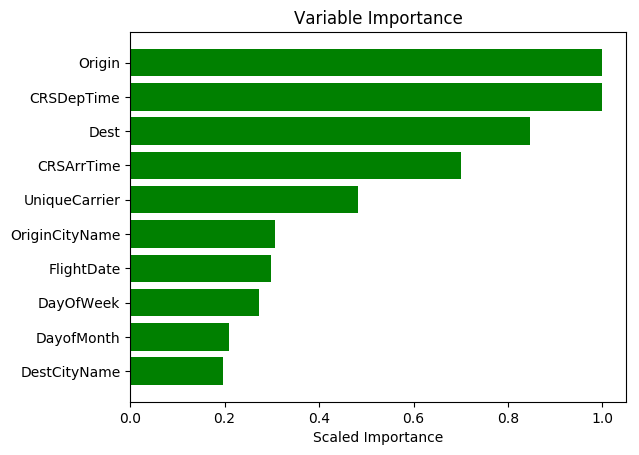

In [146]:
import matplotlib.pyplot as plt
import seaborn
mymodel=gb
plt.rcdefaults()
fig, ax = plt.subplots()
variables = mymodel._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = mymodel._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos[0:10], scaled_importance[0:10], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos[0:10])
ax.set_yticklabels(variables[0:10])
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

# Part II: Modeling Classifiction with h2o with original variables.

In this section we compare the performance to the final model with our added variables.

### II.0) Class variable creation

In [147]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

First we recreate the class variable that we will use.

In [149]:
def get_class(x):
    if x > 20:
        return 1
    else:
        return 0
df_original['DepDelay_class']=df_original['DepDelay_pos'].apply(lambda x : get_class(x))

In [186]:
df_prelim = h2o.H2OFrame(df_original)
df_prelim['DepDelay_class']=df_prelim['DepDelay_class'].asfactor()
train, valid, test = df_prelim.split_frame([0.7, 0.15], seed=1234)
train['DepDelay_class']=train['DepDelay_class'].asfactor()
test['DepDelay_class']=test['DepDelay_class'].asfactor()
valid['DepDelay_class']=valid['DepDelay_class'].asfactor()


Parse progress: |█████████████████████████████████████████████████████████| 100%


## I.1) Linear Models

For the linear model, we do a grid search to find the optimal paramater. 

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

#Build grid search with previously made GBM and hyper parameters
hyper_parameters = {'alpha': [0.01,0.3,0.5], 'lambda': [1e-5,1e-6,1e-7,1e-8]}

# test search_criteria plumbing and max_models
search_criteria = { 'strategy': "RandomDiscrete", 'max_models': 3 }
max_models_g = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial'),
                             hyper_parameters, search_criteria=search_criteria)
max_models_g.train(x=df_prelim.drop(['DepDelay','DepDelay_pos','DepDelay_class'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)



In [189]:
best_model=H2OGeneralizedLinearEstimator(family='binomial',alpha=0.01,lambda_=1.0e-8)
best_model.train(x=df_prelim.drop(['DepDelay','DepDelay_pos','DepDelay_class'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [191]:
out = best_model.model_performance(test)
fprs_best_model = out.fprs
tprs_best_model = out.tprs
roc_best_model = zip(fprs_best_model, tprs_best_model)

## II.2) Nonlinear Models

11.1a) Random Forest Classifier

In [192]:

rf_c=H2ORandomForestEstimator()

rf_c.train(x=df_prelim.drop(['DepDelay','DepDelay_class','DepDelay_pos'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
rf_c.auc(valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


0.700505010421721

In [195]:
out = rf_c.model_performance(test)
fprs_rf_c = out.fprs
tprs_rf_c = out.tprs
roc_rf_c = zip(fprs_rf_c, tprs_rf_c)

II.1b) Gradient Booster Classifier

In [198]:
gb_c=H2OGradientBoostingEstimator()#ntrees=50, max_depth=10, nfolds=10)

gb_c.train(x=df_prelim.drop(['DepDelay','DepDelay_class','DepDelay_pos'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
gb_c.auc(valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.6841502475989841

In [199]:
out = gb_c.model_performance(test)
fprs_gbb_c = out.fprs
tprs_gbb_c = out.tprs
roc_gbb_c = zip(fprs_gbb_c, tprs_gbb_c)

## II.3) Feature Importance

II.3a) Random Forest

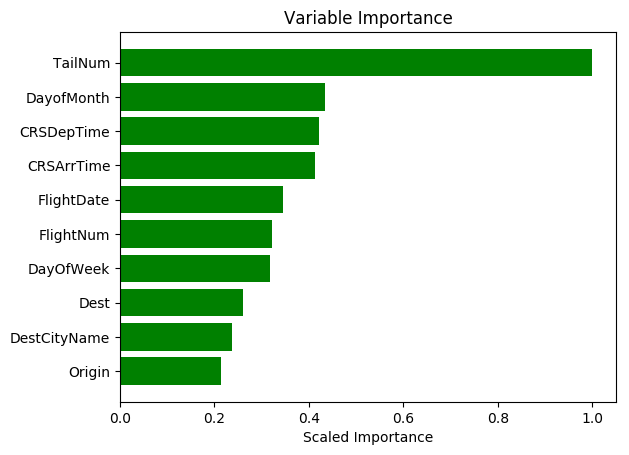

In [63]:
import matplotlib.pyplot as plt
mymodel=rf_c
plt.rcdefaults()
fig, ax = plt.subplots()
variables = mymodel._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = mymodel._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos[0:10], scaled_importance[0:10], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos[0:10])
ax.set_yticklabels(variables[0:10])
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

II.3b) Gradient Boosting

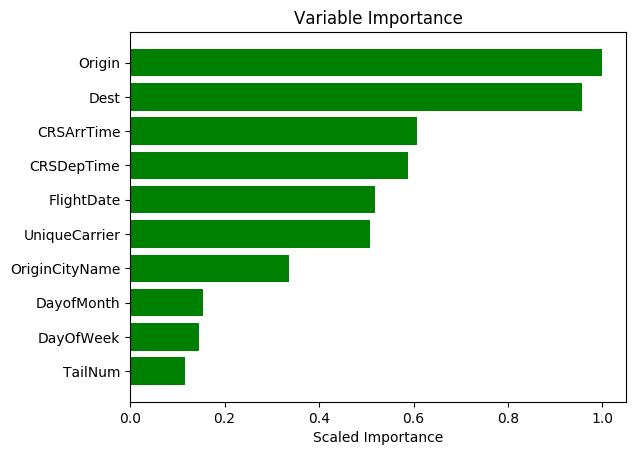

In [66]:
import matplotlib.pyplot as plt
mymodel=gb_c
plt.rcdefaults()
fig, ax = plt.subplots()
variables = mymodel._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = mymodel._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos[0:10], scaled_importance[0:10], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos[0:10])
ax.set_yticklabels(variables[0:10])
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

# Part III: Classification with all variables

In [18]:
df_poisson=pd.read_csv('../data/hourly_mean_prediction.tsv',sep='\t')

In [26]:
df_poisson.head().dtypes

actual        float64
date           object
prediction    float64
day            object
hour            int64
dtype: object

In [184]:
df_airline.to_csv('../data/final_909pm.tsv',sep='\t',index=False)

In [25]:
df_poisson['day']=df_poisson['day'].astype(str)

In [27]:
df_poisson['FlightDate']=df_poisson['day'].astype(str)

In [10]:
import re
df_airline['FlightDate']=df_airline['FlightDate'].apply(lambda x : re.sub("-","",x))

In [11]:
df_poisson['FlightDate']=df_poisson['day'].astype(str)

In [107]:
df_airline['date']=df_airline['date'].astype(str)

In [29]:
def make_hour(x):
    return str(x).split(' ')[1].split(':')[0]
df_airline['hour']=df_airline['CRSDepTime'].apply(lambda x : make_hour(x))

In [33]:
df_airline['hour']=df_airline['hour'].astype(int)

In [ ]:
df_airline['hour']=df_airline['hour'].astype(int)

In [44]:
df_airline=pd.merge(df_airline,df_poisson[['prediction','FlightDate','hour']],how='inner',on=['FlightDate','hour'])

In [45]:
df_airline.to_csv('../data/full_mon458pm.tsv',sep='\t',index=False)

In [172]:
df_airline['poisson_hourly']=df_airline['prediction_y']
df_airline['poisson_daily']=df_airline['prediction_x']
df_airline_filtered=df_airline.drop(['prediction_y','prediction_x','tailnum','locationID','DestCityName','Locid','date','OriginAirportID','OriginCityName','airport_code','DestStateName'],1)

In [160]:
df_airline_filtered.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportSeqID,OriginCityMarketID,Origin,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,CRSArrTime,Distance,DepDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,Date,Weekday,Holiday.Name,Holiday.Type,Rank,S/L,Hub,CY 16 Enplanements,CY 15 Enplanements,% Change,airport_code,lat,lon,TMAX,TMIN,PRCP,AWND,TAVG,WDF2,WDF5,WSF2,WSF5,TOBS,SNOW,SNWD,WT01,WT08,WT03,WT02,PSUN,TSUN,PGTM,WESD,WESF,WT05,WT06,WT04,WT11,WT09,DAPR,MDPR,SN32,SX32,WT07,WT10,SN52,SX52,EVAP,MNPN,MXPN,WDMV,DepDelay_pos,DepDelay_class,hour,poisson_hourly,poisson_daily
0,2016,1,1,7,4,20160107,AA,19805,AA,N434AA,43,1129804,30194,DFW,TX,48,Texas,74,11433,1143302,31295,DTW,MI,26,Michigan,43,2016-01-07 11:00:00,2016-01-07 14:38:00,986.0,-4.0,Corporation,MCDONNELL DOUGLAS,08/12/1987,DC-9-83(MD-83),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987,NaN,NaN,NaN,NaN,4,P,L,31274875.0,31589839.0,-1.0,USW00003927,32.9,97.0,178,89,15,39,110,170,170,81,98,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,11,9.4828,12.485015
1,2016,1,1,7,4,20160107,AA,19805,AA,N436AA,335,1129804,30194,DFW,TX,48,Texas,74,13930,1393004,30977,ORD,IL,17,Illinois,41,2016-01-07 11:00:00,2016-01-07 13:26:00,802.0,34.0,Corporation,MCDONNELL DOUGLAS,08/18/1987,DC-9-83(MD-83),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987,NaN,NaN,NaN,NaN,4,P,L,31274875.0,31589839.0,-1.0,USW00003927,32.9,97.0,178,89,15,39,110,170,170,81,98,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34.0,1,11,9.4828,12.485015
2,2016,1,1,7,4,20160107,AA,19805,AA,N488AA,2528,1129804,30194,DFW,TX,48,Texas,74,13244,1324402,33244,MEM,TN,47,Tennessee,54,2016-01-07 11:55:00,2016-01-07 13:24:00,431.0,-7.0,Corporation,MCDONNELL DOUGLAS,03/29/1989,DC-9-82(MD-82),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,NaN,NaN,NaN,NaN,4,P,L,31274875.0,31589839.0,-1.0,USW00003927,32.9,97.0,178,89,15,39,110,170,170,81,98,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,11,9.4828,12.485015
3,2016,1,1,7,4,20160107,AA,19805,AA,N567AA,1373,1129804,30194,DFW,TX,48,Texas,74,12451,1245102,31136,JAX,FL,12,Florida,33,2016-01-07 11:55:00,2016-01-07 15:13:00,918.0,-6.0,Individual,DEHAVILLAND,01/09/1976,OTTER DHC-3,Valid,Fixed Wing Single-Engine,Reciprocating,1959,NaN,NaN,NaN,NaN,4,P,L,31274875.0,31589839.0,-1.0,USW00003927,32.9,97.0,178,89,15,39,110,170,170,81,98,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,11,9.4828,12.485015
4,2016,1,1,7,4,20160107,AA,19805,AA,N184US,522,1129804,30194,DFW,TX,48,Texas,74,14107,1410702,30466,PHX,AZ,4,Arizona,81,2016-01-07 11:50:00,2016-01-07 13:31:00,868.0,-3.0,Corporation,AIRBUS INDUSTRIE,01/31/2002,A321-211,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2002,NaN,NaN,NaN,NaN,4,P,L,31274875.0,31589839.0,-1.0,USW00003927,32.9,97.0,178,89,15,39,110,170,170,81,98,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,11,9.4828,12.485015


In [173]:

df_prelim = h2o.H2OFrame(df_airline_filtered)
df_prelim['DepDelay_class']=df_prelim['DepDelay_class'].asfactor()
train, valid, test = df_prelim.split_frame([0.7, 0.15], seed=1234)
train['DepDelay_class']=train['DepDelay_class'].asfactor()
test['DepDelay_class']=test['DepDelay_class'].asfactor()
valid['DepDelay_class']=valid['DepDelay_class'].asfactor()


Parse progress: |██████████████████████████████████████████████████████████████| 100%


## Part II.1) Linear Models

In [178]:
best_linear=H2OGeneralizedLinearEstimator(family='binomial',alpha=0.01,lambda_=1e-5)
best_linear.train(x=df_prelim.drop(['DepDelay','DepDelay_pos','DepDelay_class'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
best_linear.auc(valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


0.7107056788950973

## Part II.1) Nonlinear Models

II.1a) Random Forest Classifier

In [174]:

rf_c=H2ORandomForestEstimator()#ntrees=50, max_depth=10, nfolds=10)

rf_c.train(x=df_prelim.drop(['DepDelay','DepDelay_class','DepDelay_pos'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
rf_c.auc(valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


0.7513694191629958

II.2b) Gradient Boosting Estimator

In [179]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gb_c=H2OGradientBoostingEstimator()#ntrees=50, max_depth=10, nfolds=10)

gb_c.train(x=df_prelim.drop(['DepDelay','DepDelay_class','DepDelay_pos'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
gb_c.auc(valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.7471532997226499

## Part II.3) Feature Importance

II.3a) Random Forest Classifier

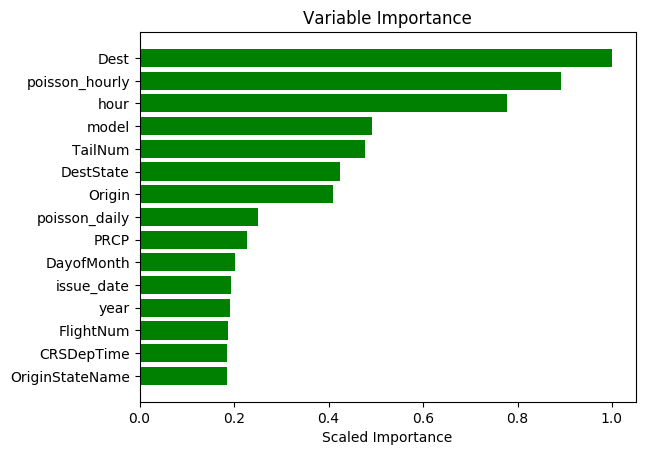

In [175]:
import matplotlib.pyplot as plt
mymodel=rf_c
num_features=15
plt.rcdefaults()
fig, ax = plt.subplots()
variables = mymodel._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = mymodel._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos[0:num_features], scaled_importance[0:num_features], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos[0:num_features])
ax.set_yticklabels(variables[0:num_features])
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

II.3b) Gradient Boosted Classifier

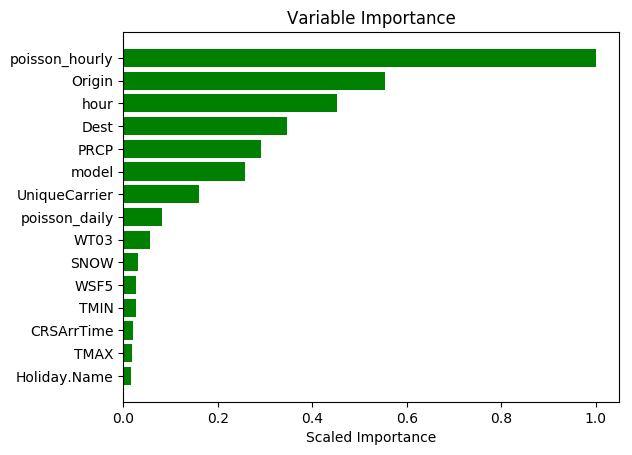

In [180]:
import matplotlib.pyplot as plt
mymodel=gb_c
num_features=15
plt.rcdefaults()
fig, ax = plt.subplots()
variables = mymodel._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = mymodel._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos[0:num_features], scaled_importance[0:num_features], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos[0:num_features])
ax.set_yticklabels(variables[0:num_features])
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [68]:
from sklearn import metrics

In [176]:
from sklearn import metrics
out = rf_c.model_performance(test)
fprs_rf = out.fprs
tprs_rf = out.tprs
roc = zip(fprs, tprs)

In [202]:
from sklearn import metrics
out = gb.model_performance(test)
fprs_gb = out.fprs
tprs_gb = out.tprs
roc = zip(fprs, tprs)

## Linear Model

In [110]:
from h2o.grid.grid_search import H2OGridSearch
#Build grid search with previously made GBM and hyper parameters
hyper_parameters = {'alpha': [0.01,0.3,0.5], 'lambda': [1e-5,1e-6,1e-7,1e-8]}

# test search_criteria plumbing and max_models
search_criteria = { 'strategy': "RandomDiscrete", 'max_models': 3 }
max_models_g = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial'),
                             hyper_parameters, search_criteria=search_criteria)
max_models_g.train(x=df_prelim.drop(['DepDelay','DepDelay_pos','DepDelay_class'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)



glm Grid Build progress: |████████████████████████████████████████████████| 100%


/Users/dgoldma1/anaconda/lib/python3.6/site-packages/h2o/job.py:65: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


In [127]:
best_linear=H2OGeneralizedLinearEstimator(family='binomial',alpha=0.01,lambda_=1e-5)
best_linear.train(x=df_prelim.drop(['DepDelay','DepDelay_pos','DepDelay_class'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)


glm Model Build progress: |███████████████████████████████████████████████| 100%


/Users/dgoldma1/anaconda/lib/python3.6/site-packages/h2o/job.py:65: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


In [111]:
max_models_g.auc(test)

{'Grid_GLM_py_7_sid_b9bd_model_python_1500325966275_56_model_0': 0.7062968570792488,
 'Grid_GLM_py_7_sid_b9bd_model_python_1500325966275_56_model_1': 0.7044157231279455,
 'Grid_GLM_py_7_sid_b9bd_model_python_1500325966275_56_model_2': 0.7060154223499939}

In [128]:
from sklearn import metrics
out = best_linear.model_performance(test)
fprs_linear = out.fprs
tprs_linear = out.tprs
roc = zip(fprs_linear, tprs_linear)

## Gradient Boosting Macine

In [62]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gb_c=H2OGradientBoostingEstimator()#ntrees=50, max_depth=10, nfolds=10)

gb_c.train(x=df_prelim.drop(['DepDelay','DepDelay_class','DepDelay_pos'],1).columns,y="DepDelay_class",training_frame=train, validation_frame=valid)
gb_c.auc(valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.7470208871524803

In [113]:
out = gb_c.model_performance(test)
fprs_gbc = out.fprs
tprs_gbc = out.tprs
roc_gbc = zip(fprs_gbc, tprs_gbc)

# Final Plot

This is the final plot which shows the comparison of all of the models above.

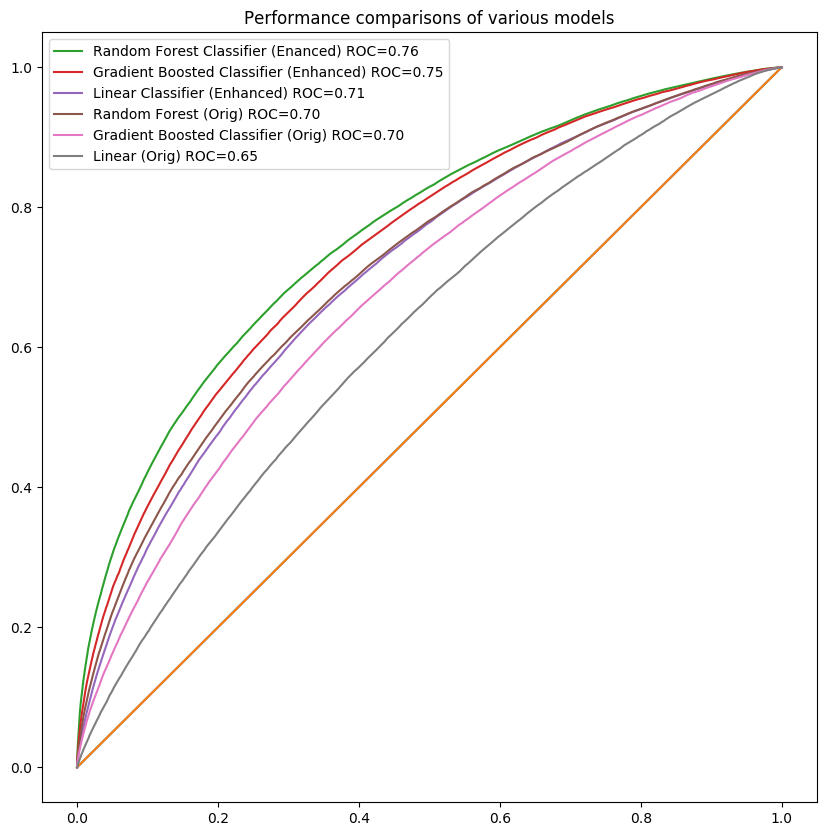

In [201]:
plt.figure(figsize=(10,10))
plt.title('Performance comparisons of various models')
plt.plot(fprs_gbc,fprs_gbc)
plt.plot(fprs_linear,fprs_linear)

plt.plot(fprs,tprs,label='Random Forest Classifier (Enanced) ROC=0.76')
plt.plot(fprs_gbc,tprs_gbc,label='Gradient Boosted Classifier (Enhanced) ROC=0.75')
plt.plot(fprs_linear,tprs_linear,label='Linear Classifier (Enhanced) ROC=0.71')


plt.plot(fprs_rf_c,tprs_rf_c,label="Random Forest (Orig) ROC=0.70")
plt.plot(fprs_gbb_c,tprs_gbb_c,label="Gradient Boosted Classifier (Orig) ROC=0.70")
plt.plot(fprs_best_model,tprs_best_model,label='Linear (Orig) ROC=0.65')


plt.legend(loc=2)